In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List 

In [9]:
def generate_random_clusters_at(centers:List[tuple],spreads:List,num_points_per_cluster:List[int])->pd.core.frame.DataFrame:
    """_summary_

    Args:
        centers (list[tuple]): list of tuples of center coordinate
        spreads (list): list of floating point indicating spreads
        num_points_per_cluster (list[int]): number of points in each cluster.
    """

    num_clusters=len(centers)
    points=[]
    for iind in range(num_clusters):
        point=np.random.randn(num_points_per_cluster[iind],3)
        point[:,:2]=(point[:,:2]+centers[iind])*spreads[iind]
        point[:,2]=iind+1
        points.append(point)
    points = np.concatenate(points,axis=0)
    points=pd.DataFrame(points,columns=['x','y','label'])
    points['label']=pd.Categorical(points['label'])
    return points
    

In [10]:
centers=[(7,3),(3,7),(3,3),(7,7)]
spreads=[1.8,1.5,1.1,1.3]
num_points_per_cluster=[705,3801,915,750]
points=generate_random_clusters_at(centers,spreads,num_points_per_cluster)

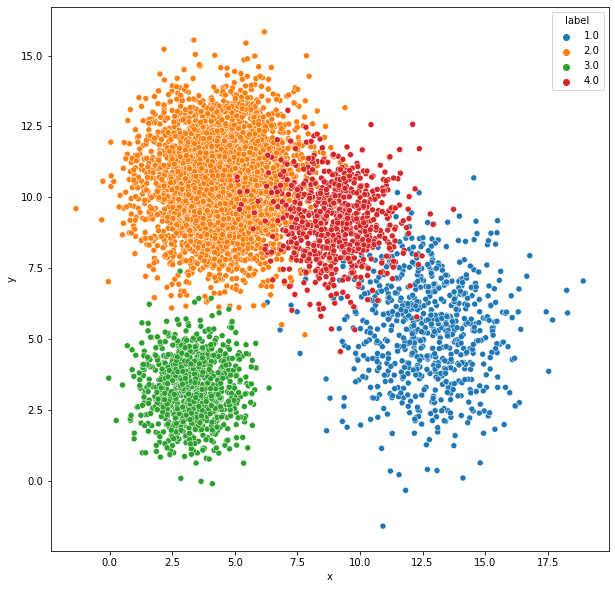

In [11]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [14]:
knc=[]
scores=[]
cv=5
for k in range(1,100,5):
    knc.append([k,KNeighborsClassifier(n_neighbors=k)])
    score=cross_val_score(knc[-1][1],points[['x','y']],points['label'],cv=cv)
    scores=scores+[[k,score[iind]] for iind in range(cv)]


In [15]:
scores=pd.DataFrame.from_records(scores,columns=['Point','SCORE'])

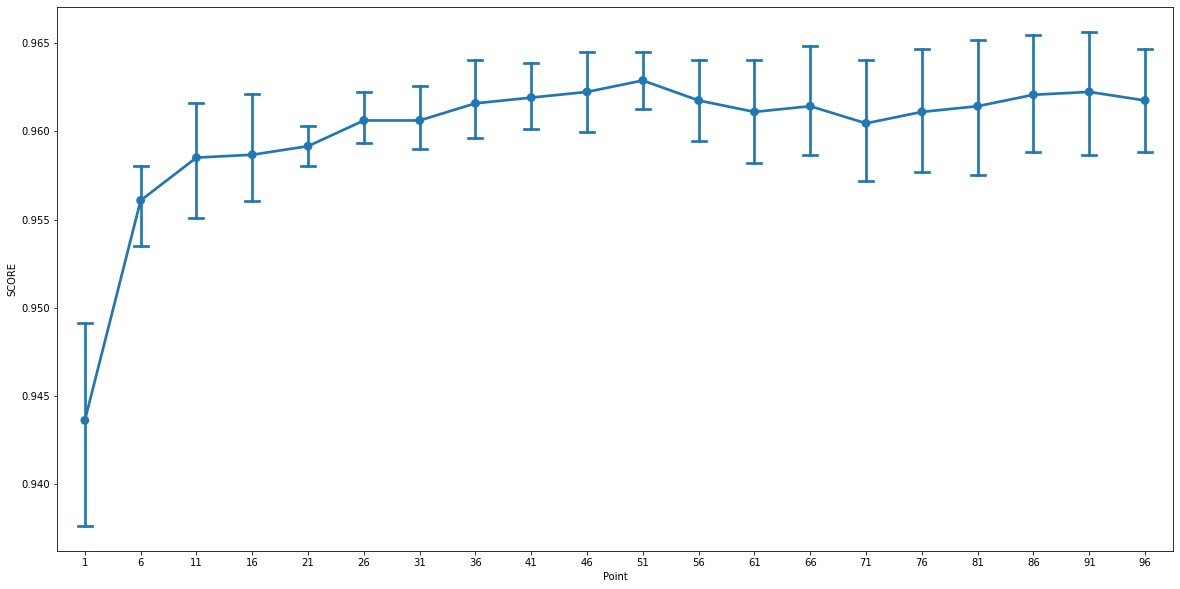

In [16]:
plt.figure(figsize=[20,10])
sns.pointplot(data=scores, x='Point', y='SCORE', dodge=0.25, capsize=0.25, errorbar='sd')
plt.show()
plt.close()

In [17]:
attribute_train,attribute_test,label_train,label_test=train_test_split(points[['x','y']],points['label'],test_size=0.3)

In [18]:
xmin = np.min(points['x'])
xmax = np.max(points['x'])
ymin = np.min(points['y'])
ymax = np.max(points['y'])
h=0.25

xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
xx_row = xx.ravel()
yy_row = yy.ravel()



c:\Users\TEST\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-19-e259598d8cfe>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


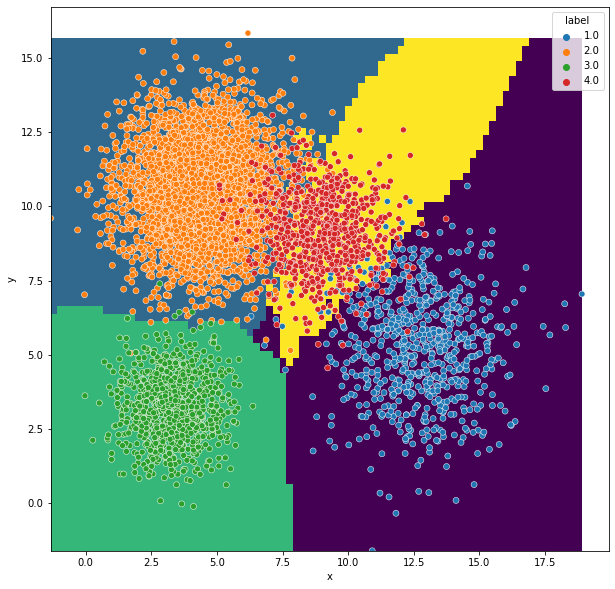

In [19]:
k = 6
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(attribute_train,label_train)
zz_row=knc.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

c:\Users\mmanivan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


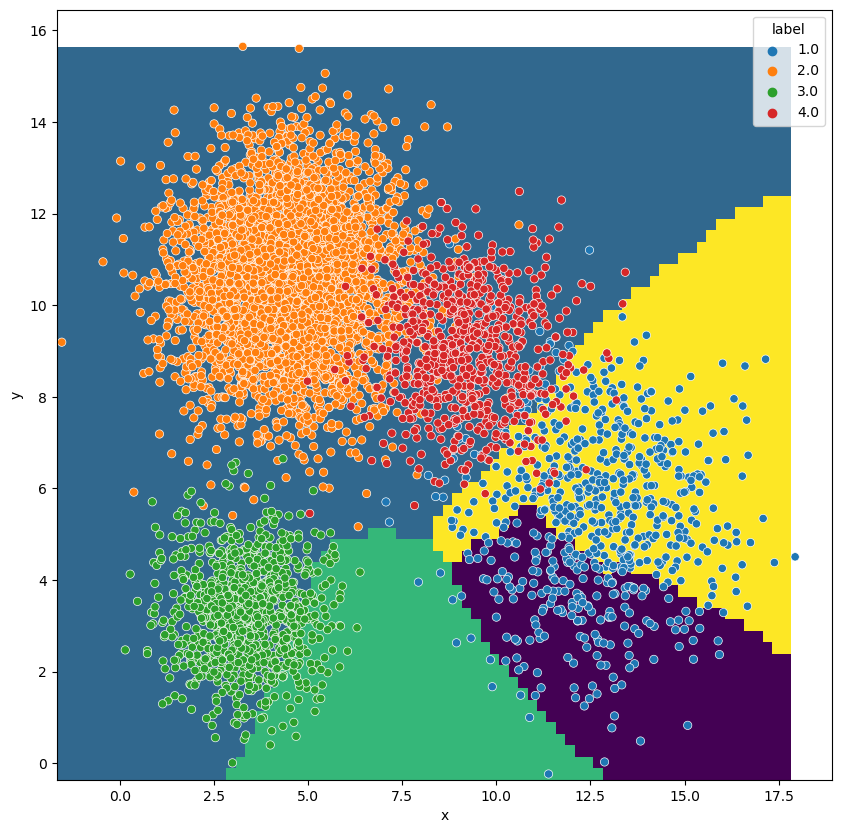

In [ ]:
k = 1500
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(attribute_train,label_train)
zz_row=knc.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [20]:
from sklearn import svm

c:\Users\TEST\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-31-28c0d5e2ecf2>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


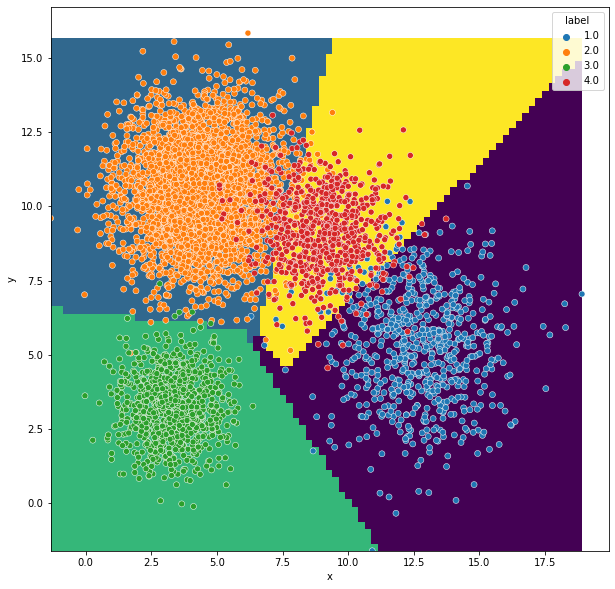

In [31]:
lcl = svm.SVC(kernel='linear')
lcl.fit(attribute_train,label_train)
zz_row=lcl.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [36]:
W = lcl.coef_[0]
I = lcl.intercept_
print(W)
print(I)

[ 1.24160153 -1.12020958]
[ -1.88530683 -11.60520766  -2.69733304 -14.043013     5.79025394
   8.61930839]


In [32]:
a = -W[0]/W[1]
b = I[0]/W[1]
print(a,b)

1.1083653992712548 1.6829947446748723


In [30]:
lcl = svm.SVC(kernel='linear')
lcl.fit(attribute_train,label_train)
zz_row=lcl.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

1.1083653992712548 1.6829947446748723


In [40]:
help(W.__str__)

Help on method-wrapper object:

__str__ = class method-wrapper(object)
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __objclass__
 |  
 |  __self__
 |  
 |  __text_signature__

